# **Setup and Library imports**


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set some styling for our plots
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')
print("Libraries imported successfully!")

# Create directories to save outputs, if they don't exist
if not os.path.exists('csv_files'):
    os.makedirs('csv_files')
if not os.path.exists('outputs'):
    os.makedirs('outputs')

print("Output directories 'csv_files/' and 'outputs/' are ready.")

Libraries imported successfully!
Output directories 'csv_files/' and 'outputs/' are ready.


# **Load Datasets**

In [25]:
try:
    # Load the datasets
    trader_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_Jaiprakash/csv_files/historical_data.csv')
    sentiment_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_Jaiprakash/csv_files/fear_greed_index.csv')

    print("--- Trader Data ---")
    trader_df.info()
    print("\n--- Sentiment Data ---")
    sentiment_df.info()

except FileNotFoundError:
    print("Please make sure 'historical_data.csv' and 'fear_greed_index.csv' are uploaded to Colab.")


--- Trader Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtype

# **Data Cleaning**

In [26]:
# --- 1. Clean Trader Data (trader_df) ---

# Standardize column names (lowercase, replace spaces with underscores)
trader_df.columns = trader_df.columns.str.lower().str.replace(' ', '_')

# Convert 'timestamp_ist' to datetime objects, extracting only the date for merging
trader_df['date'] = pd.to_datetime(trader_df['timestamp_ist'], dayfirst=True).dt.date

# Ensure numeric columns are treated as numbers
# IMPORTANT: Assuming 'leverage' column exists as per assignment instructions.
# If it doesn't, you can remove 'leverage' from this list.
numeric_cols = ['size_usd', 'closed_pnl', 'fee']
for col in numeric_cols:
    trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce')

# Drop rows where key numeric data might be missing after conversion
trader_df.dropna(subset=numeric_cols, inplace=True)


In [27]:
# --- 2. Clean Sentiment Data (sentiment_df) ---

# Convert 'date' column to datetime objects
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# --- 3. Merge the two DataFrames ---
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')

# Save the cleaned and merged data
merged_df.to_csv('csv_files/cleaned_and_merged_data.csv', index=False)

print("Data cleaning and merging complete. Merged DataFrame has", merged_df.shape[0], "rows.")
print("Cleaned data saved to 'csv_files/cleaned_and_merged_data.csv'")
merged_df.head()

Data cleaning and merging complete. Merged DataFrame has 211218 rows.
Cleaned data saved to 'csv_files/cleaned_and_merged_data.csv'


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


# **EDA - How does Trading volume change with market Sentiment?**

--- Volume Analysis by Sentiment ---
  classification  average_trade_volume_usd  total_trade_volume_usd
0   Extreme Fear               5349.731843            1.144843e+08
1  Extreme Greed               3112.251565            1.244652e+08
2           Fear               7816.109931            4.833248e+08
3          Greed               5736.884375            2.885825e+08
4        Neutral               4782.732661            1.802421e+08


/tmp/ipython-input-221711755.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_analysis.sort_values('average_trade_volume_usd', ascending=False),


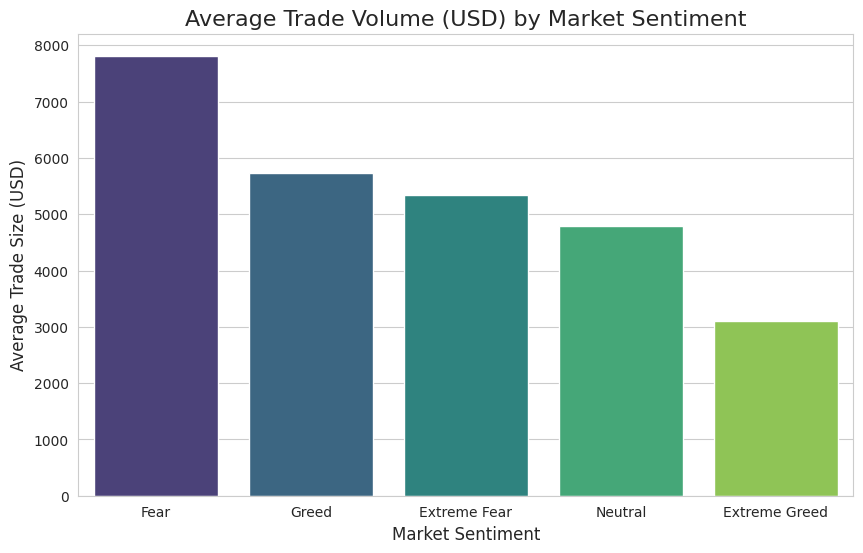

In [28]:
# Group by sentiment classification and calculate the average and total trading volume
volume_analysis = merged_df.groupby('classification')['size_usd'].agg(['mean', 'sum']).reset_index()
volume_analysis = volume_analysis.rename(columns={'mean': 'average_trade_volume_usd', 'sum': 'total_trade_volume_usd'})

print("--- Volume Analysis by Sentiment ---")
print(volume_analysis)

# Plotting the Average Trade Volume
plt.figure(figsize=(10, 6))
sns.barplot(data=volume_analysis.sort_values('average_trade_volume_usd', ascending=False),
            x='classification', y='average_trade_volume_usd', palette='viridis')
plt.title('Average Trade Volume (USD) by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average Trade Size (USD)', fontsize=12)
plt.xticks(rotation=0)

# Save the plot
plt.savefig('outputs/avg_volume_by_sentiment.png')
plt.show()

**Is Profitability different in 'Fear' vs. 'Greed' markets?** We only want to analyze trades with a realized profit or loss

/tmp/ipython-input-2708224457.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pnl_df, x='classification', y='closed_pnl', palette='coolwarm', showfliers=False)


Plot saved to 'outputs/pnl_distribution_by_sentiment.png'


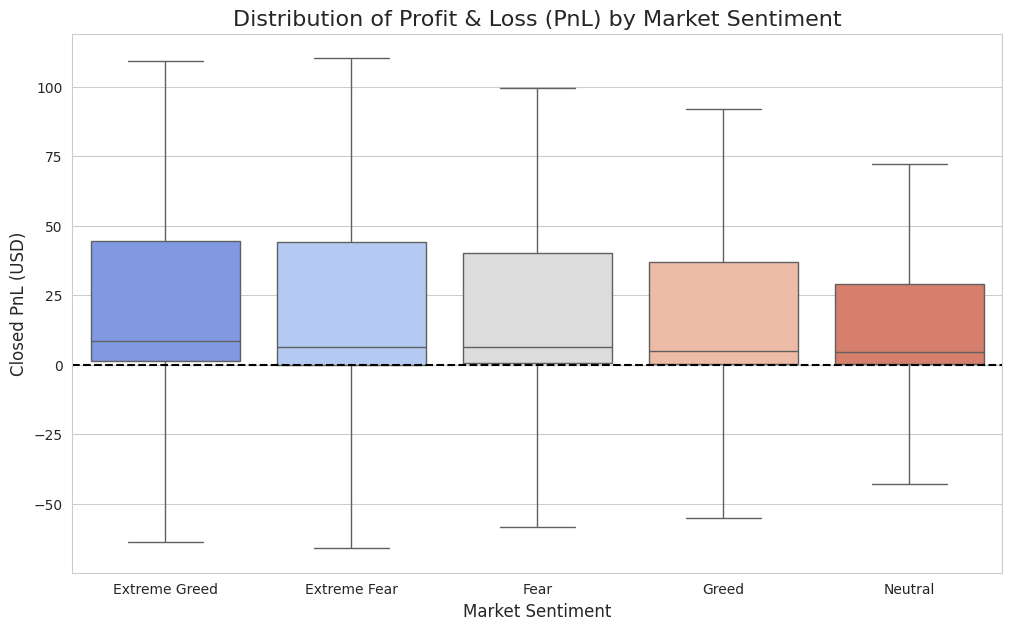

In [43]:
pnl_df = merged_df[merged_df['closed_pnl'] != 0].copy()

plt.figure(figsize=(12, 7))
# Create a boxplot to see the distribution of PnL. 'showfliers=False' hides extreme outliers for a cleaner plot.
sns.boxplot(data=pnl_df, x='classification', y='closed_pnl', palette='coolwarm', showfliers=False)
plt.title('Distribution of Profit & Loss (PnL) by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Closed PnL (USD)', fontsize=12)
plt.axhline(0, color='black', linestyle='--') # Add a line at PnL=0 for reference

# Save the plot to the 'outputs' directory
plt.savefig('outputs/pnl_distribution_by_sentiment.png')
print("Plot saved to 'outputs/pnl_distribution_by_sentiment.png'")
plt.show()

**EDA - Are traders more likely to go Long or Short based on sentiment?**

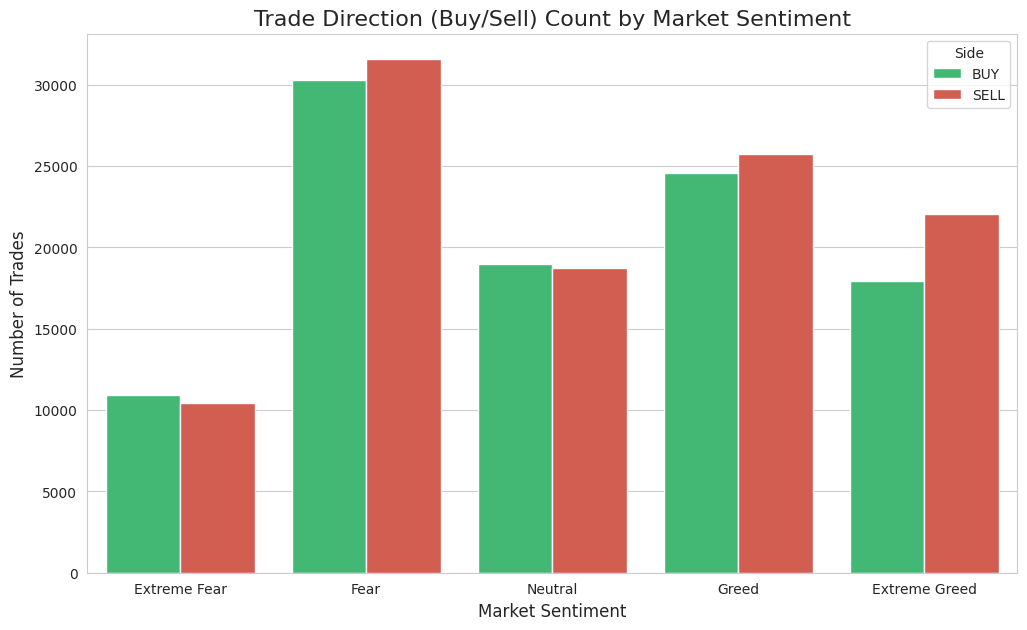

In [30]:


plt.figure(figsize=(12, 7))
sns.countplot(data=merged_df, x='classification', hue='side', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'], palette=['#2ecc71', '#e74c3c'])
plt.title('Trade Direction (Buy/Sell) Count by Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.legend(title='Side')

# Save the plot
plt.savefig('outputs/trade_direction_by_sentiment.png')
plt.show()

**EDA - What is the ratio of profitable trades in different sentiments?**

--- Profit/Loss Ratio by Sentiment ---
  classification outcome  percentage
0   Extreme Fear  Profit   76.215645
1   Extreme Fear    Loss   23.784355
2  Extreme Greed  Profit   89.167026
3  Extreme Greed    Loss   10.832974
4           Fear  Profit   87.288647
5           Fear    Loss   12.711353
6          Greed  Profit   76.890690
7          Greed    Loss   23.109310
8        Neutral  Profit   82.388898
9        Neutral    Loss   17.611102


/tmp/ipython-input-2596104461.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Trade Outcome')



Plot saved to 'outputs/profit_loss_ratio_by_sentiment.png'


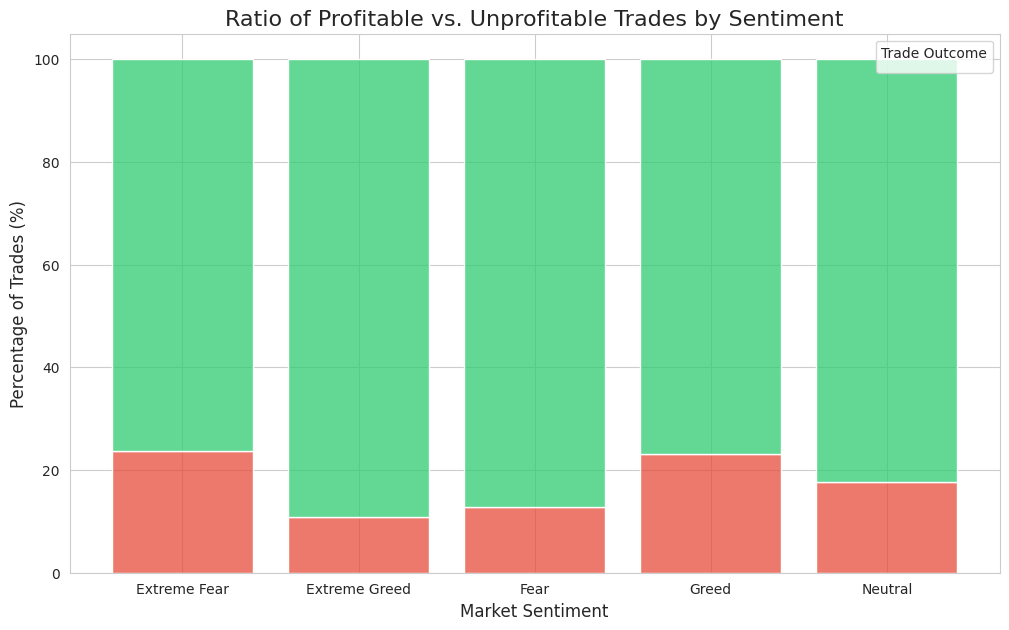

In [38]:
# Use the pnl_df from Cell 5 which excludes trades with PnL of 0
pnl_df['outcome'] = np.where(pnl_df['closed_pnl'] > 0, 'Profit', 'Loss')

# Calculate the percentage of profitable/unprofitable trades for each sentiment
ratio_df = pnl_df.groupby('classification')['outcome'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

print("--- Profit/Loss Ratio by Sentiment ---")
print(ratio_df)

# Create the 100% stacked bar chart
plt.figure(figsize=(12, 7))
sns.histplot(data=ratio_df, x='classification', hue='outcome', weights='percentage',
             multiple='stack', palette={'Profit': '#2ecc71', 'Loss': '#e74c3c'},
             hue_order=['Profit', 'Loss'], shrink=0.8)

plt.title('Ratio of Profitable vs. Unprofitable Trades by Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Percentage of Trades (%)', fontsize=12)
plt.legend(title='Trade Outcome')

# Save the plot to the 'outputs' directory
plt.savefig('outputs/profit_loss_ratio_by_sentiment.png')
print("\nPlot saved to 'outputs/profit_loss_ratio_by_sentiment.png'")
plt.show()

Plot saved to 'outputs/sentiment_volume_over_time.png'


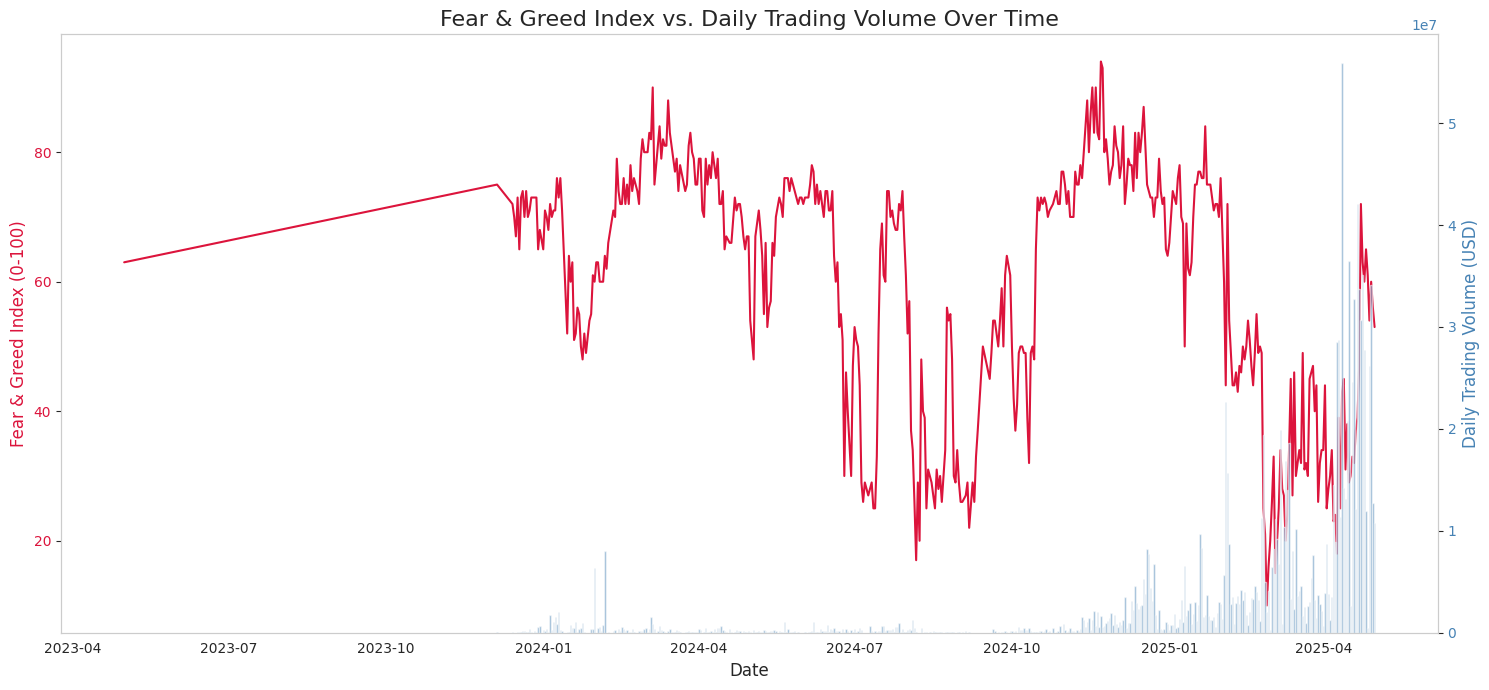

In [39]:
# =============================================================================
# Cell 9: EDA - Time Series of Sentiment vs. Daily Trading Volume
# =============================================================================

# Prepare the data for time-series plotting
sentiment_over_time = sentiment_df.set_index(pd.to_datetime(sentiment_df['date'])).sort_index()
volume_over_time = trader_df.groupby('date')['size_usd'].sum()
volume_over_time.index = pd.to_datetime(volume_over_time.index)

# Join the two time series
time_series_df = sentiment_over_time.join(volume_over_time).dropna()

# Create the dual-axis plot
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot 1: Sentiment Index
ax1.plot(time_series_df.index, time_series_df['value'], color='crimson', label='Fear & Greed Index')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Fear & Greed Index (0-100)', color='crimson', fontsize=12)
ax1.tick_params(axis='y', labelcolor='crimson')
ax1.grid(False)

# Create the second y-axis
ax2 = ax1.twinx()
# Plot 2: Trading Volume
ax2.bar(time_series_df.index, time_series_df['size_usd'], color='steelblue', alpha=0.6, label='Daily Volume (USD)')
ax2.set_ylabel('Daily Trading Volume (USD)', color='steelblue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='steelblue')
ax2.grid(False)

plt.title('Fear & Greed Index vs. Daily Trading Volume Over Time', fontsize=16)
fig.tight_layout()

# Save the plot to the 'outputs' directory
plt.savefig('outputs/sentiment_volume_over_time.png')
print("Plot saved to 'outputs/sentiment_volume_over_time.png'")
plt.show()

**EDA - What are the most popular coins for each sentiment?** Find the top 10 most traded coins overall

--- Analyzing Top 10 Coins: ['HYPE', '@107', 'BTC', 'ETH', 'SOL', 'FARTCOIN', 'MELANIA', 'PURR/USDC', 'WLD', 'SUI'] ---

Plot saved to 'outputs/top_coins_by_sentiment.png'


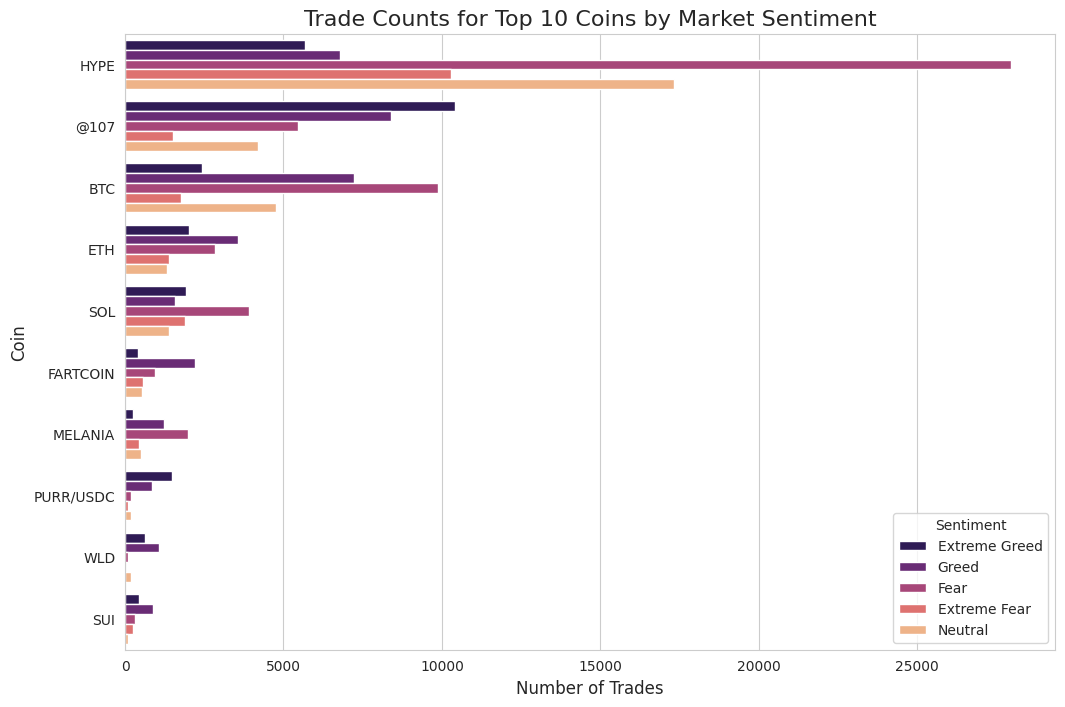

In [44]:
top_10_coins = merged_df['coin'].value_counts().nlargest(10).index
top_coins_df = merged_df[merged_df['coin'].isin(top_10_coins)]

print(f"--- Analyzing Top 10 Coins: {list(top_10_coins)} ---")

# Create the count plot
plt.figure(figsize=(12, 8))
sns.countplot(data=top_coins_df, y='coin', hue='classification', order=top_10_coins, palette='magma')
plt.title('Trade Counts for Top 10 Coins by Market Sentiment', fontsize=16)
plt.xlabel('Number of Trades', fontsize=12)
plt.ylabel('Coin', fontsize=12)
plt.legend(title='Sentiment')

# Save the plot to the 'outputs' directory
plt.savefig('outputs/top_coins_by_sentiment.png')
print("\nPlot saved to 'outputs/top_coins_by_sentiment.png'")
plt.show()